# PART 2

In [59]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt       # matplotlib.pyplot plots data
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split

In [4]:
df1 = pd.read_csv("Part2 - Data1.csv")
df2 = pd.read_csv("Part2 -Data2.csv")

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   int64  
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 312.6 KB


In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Mortgage             5000 non-null   int64  
 2   Security             5000 non-null   int64  
 3   FixedDepositAccount  5000 non-null   int64  
 4   InternetBanking      5000 non-null   int64  
 5   CreditCard           5000 non-null   int64  
 6   LoanOnCard           4980 non-null   float64
dtypes: float64(1), int64(6)
memory usage: 273.6 KB


In [13]:
df1

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level
0,1,25,1,49,91107,4,1.6,1
1,2,45,19,34,90089,3,1.5,1
2,3,39,15,11,94720,1,1.0,1
3,4,35,9,100,94112,1,2.7,2
4,5,35,8,45,91330,4,1.0,2
...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3
4996,4997,30,4,15,92037,4,0.4,1
4997,4998,63,39,24,93023,2,0.3,3
4998,4999,65,40,49,90034,3,0.5,2


In [14]:
df2

,ID,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,0,1,0,0,0,NaN
1,2,0,1,0,0,0,NaN
2,3,0,0,0,0,0,NaN
3,4,0,0,0,0,0,NaN
4,5,0,0,0,0,1,NaN
...,...,...,...,...,...,...,...
4995,4996,0,0,0,1,0,0.0
4996,4997,85,0,0,1,0,0.0
4997,4998,0,0,0,0,0,0.0
4998,4999,0,0,0,1,0,0.0


In [23]:
df = pd.merge(df1, df2, how="outer", on="ID")

In [26]:
df.isnull().values.any()

True

In [29]:
df.isnull().sum()

ID                      0
Age                     0
CustomerSince           0
HighestSpend            0
ZipCode                 0
HiddenScore             0
MonthlyAverageSpend     0
Level                   0
Mortgage                0
Security                0
FixedDepositAccount     0
InternetBanking         0
CreditCard              0
LoanOnCard             20
dtype: int64

In [32]:
# there are 20 null values in loan on card column so it is better to drop them 
df.dropna(inplace=True)

In [33]:
df.isnull().sum()

ID                     0
Age                    0
CustomerSince          0
HighestSpend           0
ZipCode                0
HiddenScore            0
MonthlyAverageSpend    0
Level                  0
Mortgage               0
Security               0
FixedDepositAccount    0
InternetBanking        0
CreditCard             0
LoanOnCard             0
dtype: int64

In [43]:
df.head(10)

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
9,10,34,9,180,93023,1,8.9,3,0,0,0,0,0,1.0
10,11,65,39,105,94710,4,2.4,3,0,0,0,0,0,0.0
11,12,29,5,45,90277,3,0.1,2,0,0,0,1,0,0.0
12,13,48,23,114,93106,2,3.8,3,0,1,0,0,0,0.0
13,14,59,32,40,94920,4,2.5,2,0,0,0,1,0,0.0
14,15,67,41,112,91741,1,2.0,1,0,1,0,0,0,0.0
15,16,60,30,22,95054,1,1.5,3,0,0,0,1,1,0.0
16,17,38,14,130,95010,4,4.7,3,134,0,0,0,0,1.0
17,18,42,18,81,94305,4,2.4,1,0,0,0,0,0,0.0
18,19,46,21,193,91604,2,8.1,3,0,0,0,0,0,1.0


In [44]:
df.shape

(4980, 14)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4980 entries, 9 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   4980 non-null   int64  
 1   Age                  4980 non-null   int64  
 2   CustomerSince        4980 non-null   int64  
 3   HighestSpend         4980 non-null   int64  
 4   ZipCode              4980 non-null   int64  
 5   HiddenScore          4980 non-null   int64  
 6   MonthlyAverageSpend  4980 non-null   float64
 7   Level                4980 non-null   int64  
 8   Mortgage             4980 non-null   int64  
 9   Security             4980 non-null   int64  
 10  FixedDepositAccount  4980 non-null   int64  
 11  InternetBanking      4980 non-null   int64  
 12  CreditCard           4980 non-null   int64  
 13  LoanOnCard           4980 non-null   float64
dtypes: float64(2), int64(12)
memory usage: 743.6 KB


In [49]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,4980.0,2510.345382,1438.011129,10.0,1265.75,2510.5,3755.250,5000.0
Age,4980.0,45.352610,11.464212,23.0,35.00,45.0,55.000,67.0
CustomerSince,4980.0,20.117671,11.468716,-3.0,10.00,20.0,30.000,43.0
HighestSpend,4980.0,73.852410,46.070090,8.0,39.00,64.0,98.000,224.0
ZipCode,4980.0,93152.420482,2123.660073,9307.0,91911.00,93407.0,94608.000,96651.0
HiddenScore,4980.0,2.395582,1.147200,1.0,1.00,2.0,3.000,4.0
MonthlyAverageSpend,4980.0,1.939536,1.750006,0.0,0.70,1.5,2.525,10.0
Level,4980.0,1.880924,0.840144,1.0,1.00,2.0,3.000,3.0
Mortgage,4980.0,56.589759,101.836758,0.0,0.00,0.0,101.000,635.0
Security,4980.0,0.104418,0.305832,0.0,0.00,0.0,0.000,1.0


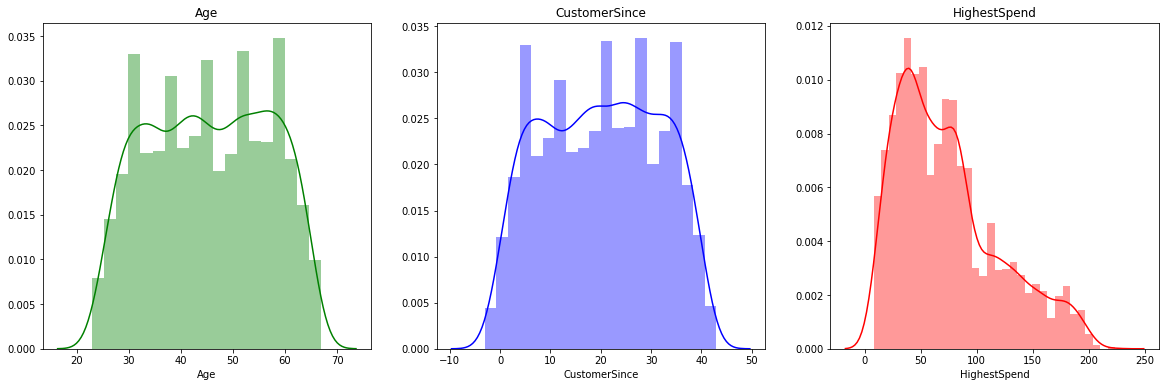

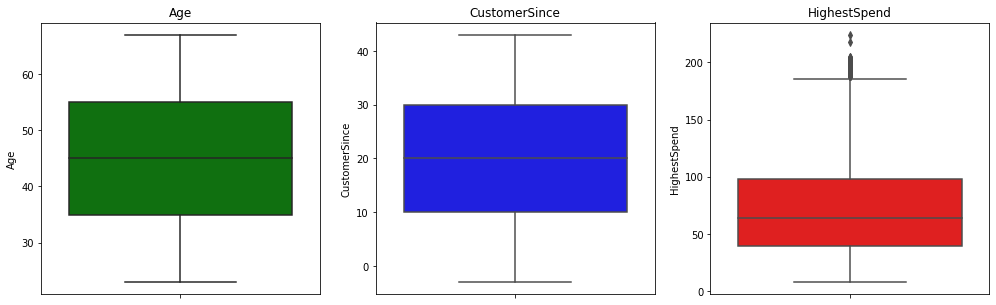

In [50]:
# Subplot 1
plt.figure(figsize=(20,6))
plt.subplot(1, 3, 1)
plt.title('Age')
sns.distplot(df['Age'],color='green')

# Subplot 2
plt.subplot(1, 3, 2)
plt.title('CustomerSince')
sns.distplot(df['CustomerSince'],color='blue')

# Subplot 3
plt.subplot(1, 3, 3)
plt.title('HighestSpend')
sns.distplot(df['HighestSpend'],color='red')


plt.figure(figsize=(17,5))

# Boxplot 1
plt.subplot(1, 3, 1)
plt.title('Age')
sns.boxplot(df['Age'],orient='vertical',color='green')

# Boxplot 2
plt.subplot(1, 3, 2)
plt.title('CustomerSince')
sns.boxplot(df['CustomerSince'],orient='vertical',color='blue')

# Boxplot 3
plt.subplot(1, 3, 3)
plt.title('HighestSpend')
sns.boxplot(df['HighestSpend'],orient='vertical',color='red')


plt.show()

From the above analysis we can say that the feature HighestSpend Is Left Skewed With more number of outliers as
compared to the other two features

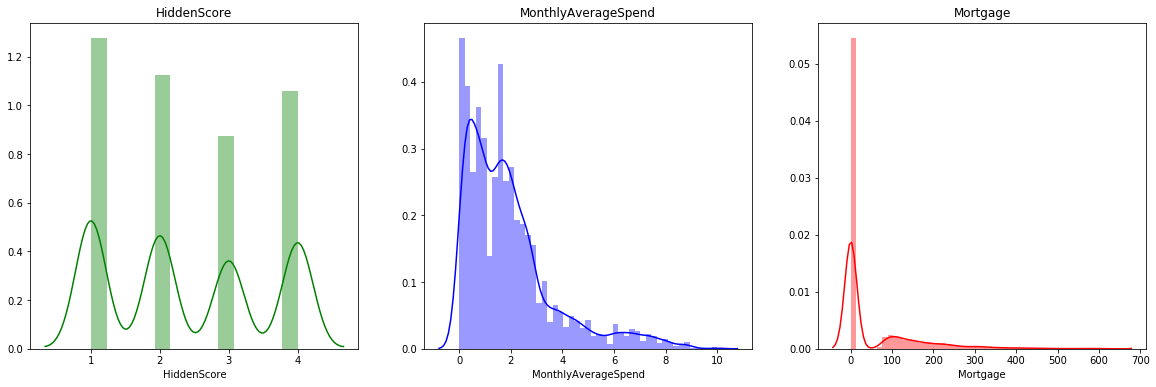

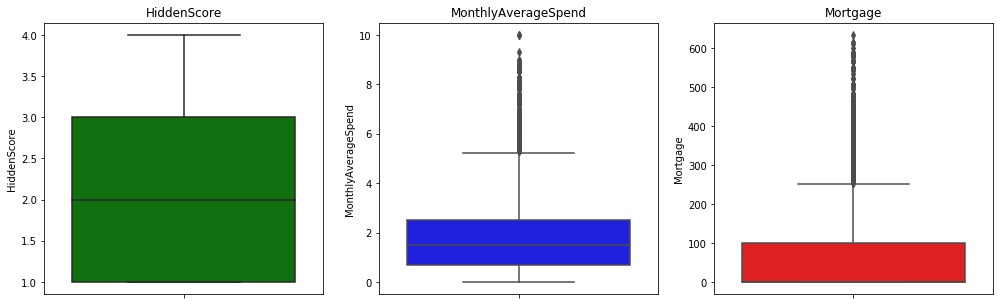

In [51]:
# Subplot 1
plt.figure(figsize=(20,6))
plt.subplot(1, 3, 1)
plt.title('HiddenScore')
sns.distplot(df['HiddenScore'],color='green')

# Subplot 2
plt.subplot(1, 3, 2)
plt.title('MonthlyAverageSpend')
sns.distplot(df['MonthlyAverageSpend'],color='blue')

# Subplot 3
plt.subplot(1, 3, 3)
plt.title('Mortgage')
sns.distplot(df['Mortgage'],color='red')


plt.figure(figsize=(17,5))

# Boxplot 1
plt.subplot(1, 3, 1)
plt.title('HiddenScore')
sns.boxplot(df['HiddenScore'],orient='vertical',color='green')

# Boxplot 2
plt.subplot(1, 3, 2)
plt.title('MonthlyAverageSpend')
sns.boxplot(df['MonthlyAverageSpend'],orient='vertical',color='blue')

# Boxplot 3
plt.subplot(1, 3, 3)
plt.title('Mortgage')
sns.boxplot(df['Mortgage'],orient='vertical',color='red')


plt.show()

From the above analysis we can conclude that Both Features MonthlyAverageSpend and Mortgage are left skewed and have large number of outliers

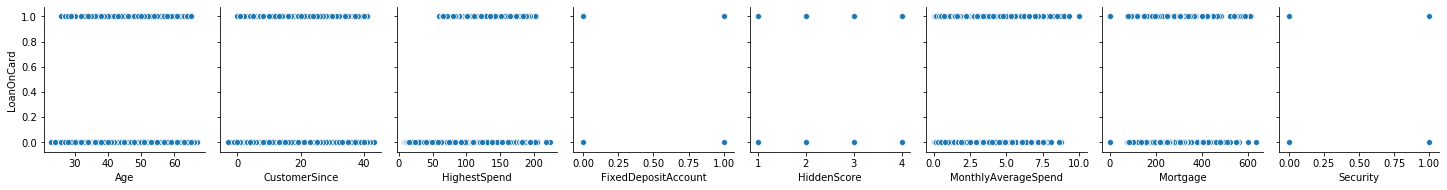

In [53]:
sns.pairplot(df, y_vars='LoanOnCard', x_vars=["Age","CustomerSince","HighestSpend","FixedDepositAccount",
                                                        "HiddenScore","MonthlyAverageSpend","Mortgage","Security"])
plt.show();

# Splitting the train and test data

In [55]:
# Predictors
X = df.drop('LoanOnCard', axis=1)

# Target Variable
y = df['LoanOnCard']

In [83]:
X.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard
9,10,34,9,180,93023,1,8.9,3,0,0,0,0,0
10,11,65,39,105,94710,4,2.4,3,0,0,0,0,0
11,12,29,5,45,90277,3,0.1,2,0,0,0,1,0
12,13,48,23,114,93106,2,3.8,3,0,1,0,0,0
13,14,59,32,40,94920,4,2.5,2,0,0,0,1,0


In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X_train.shape

(3486, 13)

In [62]:
X_test.shape

(1494, 13)

# Logistic Regression Part 

In [63]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [64]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [65]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [66]:
log_reg = LogisticRegression(max_iter=1000)

In [67]:
scores = cross_val_score(log_reg, X_train, y_train, cv=10)
print('Cross-Validation Accuracy Scores', scores)

Cross-Validation Accuracy Scores [0.94269341 0.92836676 0.93982808 0.95988539 0.94555874 0.96275072
 0.95402299 0.95402299 0.9683908  0.94827586]


In [68]:
scores = pd.Series(scores)
scores.min(), scores.mean(), scores.max()

(0.9283667621776505, 0.9503795738234034, 0.9683908045977011)

In [69]:
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [71]:
pred_test = log_reg.predict(X_test)  # Prediction for testing data

In [72]:
# Importing Metrics for Logistic Regression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix,precision_score

In [73]:
test_accuracy=accuracy_score(y_test, pred_test)

In [74]:
print('Accuracy For Test Data Is:',np.round(test_accuracy,2))

Accuracy For Test Data Is: 0.95


In [75]:
# Prediction for Training Data
pred_train = log_reg.predict(X_train)

In [76]:
mat_train = confusion_matrix(y_train,pred_train)

print("Confusion Matrix for Training Data : \n",mat_train)

Confusion Matrix for Training Data : 
 [[3115   44]
 [ 122  205]]


In [77]:
mat_test = confusion_matrix(y_test,pred_test)
print("Confusion Matrix for Test Data : \n",mat_test)

Confusion Matrix for Test Data : 
 [[1323   18]
 [  57   96]]


In [78]:
print("Precision:",precision_score(y_test, pred_test))

Precision: 0.8421052631578947


In [79]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97      1341
         1.0       0.84      0.63      0.72       153

    accuracy                           0.95      1494
   macro avg       0.90      0.81      0.85      1494
weighted avg       0.95      0.95      0.95      1494



From the above metrics we can conclude that the precision is very high that means the model is doing great by predicting true values approx 96% of the times

In [80]:
from sklearn.metrics import roc_auc_score
print("ROC AUC score :",roc_auc_score(y_test, pred_test))

ROC AUC score : 0.8070140808001053


# Naive Bayes Classifier Using Gaussian Naive Bayes

In [81]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [82]:
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"
       % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 1494 points : 178


Submitted by - Akshat Dave 